<br>

#  Graphs, Sparse Matrices and Applications
---
<img src="https://miro.medium.com/max/1750/1*V-5yjLcZajucFtL9z-OeIg.png" width="100%"/>


[Image Source](https://miro.medium.com/max/1750/1*V-5yjLcZajucFtL9z-OeIg.png)

---
**Agenda**

 >- Introduction to Graphs
 >- Matrix representation of graphs: Adjacency and Incidence Matrix
 >- Graph Laplacians and their Properties
 >- Connectedness of Graphs
 >- Graph Partitioning
 >- Applications: Spectral Clustering
 >- Applications: Page-ranks
 >- Power iterations for dominant eigenvalue and associated eigenvector
 

<br><br><br><br>

**References**
- Fundamentals
 >1. Chapter 10 Elden on Graphs and Matrices.
 >1. Chapter 13 Elden on Page Ranking.
 >1. Chapter 16 Elden on Spectral Graph Partitioning.

- Advanced
 >1. Mining Large Graphs, [Gleich and Mahoney](https://www.cs.cornell.edu/courses/cs6241/2020sp/readings/Gleich-2016-mining.pdf).
 >1. William L Hamilton [Graph Representation Learning](https://www.cs.mcgill.ca/~wlh/grl_book/files/GRL_Book.pdf).

- Other Resources  
 >1. [Stanford Large Network Data Collection.](https://snap.stanford.edu/data/#web)
 >1. [SciPy Sparse Documentation](https://docs.scipy.org/doc/scipy/reference/sparse.html)
 >1. Read the [blog](https://dziganto.github.io/Sparse-Matrices-For-Efficient-Machine-Learning/) by David Ziganto for a comparison between sparse and dense representations of the data matrix in machine learning.
 >1. Another [blog](https://machinelearningmastery.com/sparse-matrices-for-machine-learning/) by Jason Brownlee.
 >1. [WikiPedia: Sparse Matrix](https://en.wikipedia.org/wiki/Sparse_matrix)

<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(100)
%matplotlib inline

#!jt -t grade3 -fs 110 -altp -tfs 20 -nfs 110 -cellw 90% -T


##  Graphs and  Matrices
---
<div class="alert alert-info">
A <strong>graph</strong>, $G$, is a collection of nodes, $V$, and edges, $E$, between the nodes.

$$ G = (V,\;E), \textrm{ where } V = \{v_1, v_2,\cdots, v_n \}, \textrm{ and }E \subset V \times V.
$$
</div>

### Adjacency Matrix
---

#### Directed Graphs

The **adjacency matrix** of a directed graph, 
$$A = \left[a_{ij}\right]_{n\times n} \textrm{ where } a_{ij}= \begin{cases}1, \quad  (i,\,j) \in E \\ 0,\quad \textrm{ otherwise } \end{cases}$$
where $(i,\, j)$ denotes an edge from node $i$ to node $j$. 

<img src="https://live.staticflickr.com/65535/53998598308_45924602a1_c.jpg" width='80%' />

     
 


#### Undirected Graphs

The **adjacency matrix** of an undirected graph, 
<img src="https://live.staticflickr.com/65535/53998684419_1c30139bc3_c.jpg" width='80%' />
 


>- **Note**: the adjacency matrix of an undirected graph is symmetric as $a_{ij} = a_{ji}$.

#### Edge-weighted Graphs

**Weighted adjacency matrix** has some numerical weights for every edge in the (weighted) graph.

<img src="https://live.staticflickr.com/65535/53998598293_6485ee9a75_z.jpg" width='80%' />

### Degree Matrix

The **degree** of a node is the number of edges beginning (out-degree) or terminating (in-degree) at the node.

The degree matrix $D$ of an undirected graph is a diagonal matrix where the diagonal entries $D_{kk}$ indicate the degree of the $k$-th nodes.

<img src="https://live.staticflickr.com/65535/53998360201_d4b068aeb9_z.jpg" width='70%' />

It should be noted that
$$
D = \text{diag}(A\mathbf{e}),\quad \text{ where }\quad \mathbf{e} = (1,1,\cdots,1)^T.
$$

So $A\mathbf{e} = (4,\,2,\,5,\,2,\,3,\,2)^T$ is the vector of all the degrees of all the nodes


<div class="alert alert-block alert-success">
<strong>Proposition (Elden p107)</strong> The entries of the $m$-th power of the adjacency matrix $A$ of a simple graph, $[A^m]_{ij}$ is the number of different paths of length $m$ from vertices $i$ to $j$.
</div>
<br>

An unweighted, undirected graph is called a **simple graph** if it has no self-loops and no multiple edges between any pair of nodes.

### Basic Terminology in Graph Theory

| Term    | Meaning and Explanation   |
| ----------- | ----------- |
| Loop    | An edge from a node to itself.  |
| Degree of a vertex   | Number of edges on a node.    |
| Path  | A sequence of adjacent nodes joined by edges. |
| Walk  | A path that does not repeat nodes.   |
| Circuit  | A path that starts and ends at the same node.   |
| Cycle   | A circuit without any repeatation of nodes.  |
| Bridge   | An edge whose removal makes a graph disconnected or increases the number disconnected components.|
| Tree   | A connected undirected graph without any cycles.   |
| Spanning Tree   | A subgraph(tree) of a graph that includes every node of the graph.   |
| Euler Path   | A path that passes through every edge of a connected graph.   |

### Graphs Isomorphism
---
Two graphs $G_1(V_1,\, E_1)$ and $G_2(V_2,\, E_2)$ are isomorphic if there exists a bijective mapping mapping $\phi: V_1 \to V_2$ such that the edge $(v_i,\, v_j) \in E_1$ if and only if the edge $(\phi(v_i),\, \phi(v_j)) \in E_2$.

<img src="https://live.staticflickr.com/65535/53998598343_751366d6c5_z.jpg" width="80%" />
<br>
<div class="alert alert-success">
<strong>Example</strong>: If $A$ is the adjacency matrix of a graph,  then what does $PAP^T$ represent?
</div>
<br>
<div style="display:">ANSWER: This amounts to relabeling of the nodes of the graph(<strong>Graph-isomorphism</strong>).</div>

<br>

### Incidence Matrix
[See Science Direct](https://www.sciencedirect.com/topics/mathematics/incidence-matrix)

The incidence matrix of a directed graph with $m$ nodes and $n$ edges is a rectangular matrix $C \in \mathbb{R}^{m \times n}$ where rows stand for nodes and columns stand for edges. Consider the column $C_j$ for $E_j=(v_{i_1},\; v_{i_2})$ , then we have $C_{i_1,j}=-1$, $C_{i_2,j}=1$ whereas $C_{i,j}=0$ for $i \ne i_1 \ne i_2$.

**Example**:

|Graph| Incidence Matrix, $C$ |
|---|---|
|<img src="https://live.staticflickr.com/65535/53997468812_b6ee3c7b9b_w.jpg" width=60%/>|$$
C = \begin{pmatrix}
-1 & 0 &  -1 &  0 &  -1 &  0 & 0 & 0 & 0\\
1 & -1 &  0 &  0 &  0 &  0 & 0 & 0 & 0\\
0 & 1 &  0 &  1 &  0 &  0 & 0 & -1 & 0\\
0 & 0 &  1 &  -1 &  0 &  -1 & -1 & 0 & 0\\
0 & 0 &  0 &  0 &  1 &  1 & 0 & 0 & -1\\
0 & 0 &  0 &  0 &  0 &  0 & 1 & 1 & 1
\end{pmatrix}
$$|

<div class="alert alert-info">
<strong>Example</strong>: Find the graph whose incidence matrix is given below.
<br>
$$
C = \begin{pmatrix}
-1 & 0 &  0 &  0 &  0 &  1 \\
 1 & -1 &  0 & 0 &  0 &  0 \\
 0 &  1 & -1 & 0 & 0 &  0 \\
 0 &  0 &  1 &  -1 &  0 & 0 \\
 0 &  0 &  0 &  1 &  -1 & 0 \\
 0 &  0 &  0 &  0 &  1 & -1 \\
\end{pmatrix}
$$
</div>

### Connectedness and Reducibility
---
An undirected graph is **connected** if there is no subgraph isolated from the rest of the graph. This means one can traverse from any node to any other node.
<br>

A symmetric matrix $A$ is called **reducible** if there exists a permutation matrix $P$ such that $PAP^T$ is **block-diagonal**.
$$
PAP^T = 
\begin{pmatrix}
A_1 & 0\\
0 & A_2
\end{pmatrix}
$$
In the absence of such a permutation matrix, the matrix $A$ is called, **irreducible**.
<div class="alert alert-success">
<strong>Proposition 10.2 (Elden)</strong>: An undirected graph is connected if and only of its adjacency matrix is irreducible.
</div>

A general square matrix $A$ is called **reducible** if there exists a permutation matrix $P$ such that $PAP^T$ is **block-upper-triangular**, i.e., there exist matrices $X$, $Y$ and $Z$ such that
$$
PAP^T = 
\begin{pmatrix}
X & Y\\
0 & Z
\end{pmatrix}
$$
In the absence of such a permutation matrix, the matrix $A$ is called, **irreducible**.

<div class="alert alert-success">
<strong>Proposition</strong>: A directed graph is <em>strongly connected</em> if and only if its adjacency matrix is irreducible.
</div>

## Graph Laplacian and Properties
---

<div class="alert alert-warning">
<strong>Laplacian</strong> of a simple graph (unweighted, undirected, no self-loops, no multi-edges) is defined as a square matrix, $L = D-A$, where $D$ is the diagonal matrix made of the degree of each node, and $A$ is the adjacency matrix.
<br>

$$\large
L_{ij} := \begin{cases}
  \deg(v_i) & \mbox{if}\ i = j \\
         -1 & \mbox{if}\ i \neq j\ \mbox{and}\ v_i \mbox{ is adjacent to } v_j \\
          0 & \mbox{otherwise}
\end{cases}
$$
</div>

**Example**

|Graph| Degree Matrix, $D$ | Adjacency Matrix, $A$ | Laplacian, $L=D-A$ |
|---| --- | --- | --- |
| <img src="https://live.staticflickr.com/65535/53998684444_a58dbfe87a_w.jpg" width='70%' /> | \begin{pmatrix}
3 & 0 &  0 &  0 &  0 &  0 \\
 0 & 2 &  0 & 0 &  0 &  0 \\
 0 &  0 & 3 & 0 & 0 &  0 \\
 0 &  0 &  0 &  4 &  0 & 0 \\
 0 &  0 &  0 &  0 &  3 & 0 \\
 0 &  0 &  0 &  0 &  0 & 3
\end{pmatrix} | \begin{pmatrix}
0 & 1 &  0 &  1 &  1 &  0 \\
 1 & 0 &  1 & 0 &  0 &  0 \\
 0 &  1 & 0 & 1 & 0 &  1 \\
 1 &  0 &  1 &  0 &  1 & 1 \\
 1 &  0 &  0 &  1 &  0 & 1 \\
 0 &  0 &  1 &  1 &  1 & 0 
\end{pmatrix} | \begin{pmatrix}
3 & -1 &  0 &  -1 &  -1 &  0 \\
 -1 & 2 &  -1 & 0 &  0 &  0 \\
 0 &  -1 & 3 & -1 & 0 &  -1 \\
 -1 &  0 &  -1 &  4 &  -1 & -1 \\
 -1 &  0 &  0 &  -1 &  3 & -1 \\
 0 &  0 &  -1 &  -1 &  -1 & 3 
\end{pmatrix} |

<div class="alert alert-info">
<strong>Homework</strong>: Verify the following where $L$ is the Laplacian (in undirected sense) and $C$ is the <strong>oriented incidence matrix</strong> of some simple graph:
$$ L  = CC^T$$
</div>



<br>

<div class="alert alert-success">
<strong>Normalized Laplacian</strong>:
A symmetric normalized form of Laplacian matrix is given by

$$\large
L_N := D^{-\frac{1}{2}} L D^{-\frac{1}{2}} = I - D^{-\frac{1}{2}} A D^{-\frac{1}{2}}.
$$
The elements of  $L_N$ are given by

$$
[L_N]_{ij} := 
\begin{cases}
                                     1 & \mbox{if } i = j \mbox{ and } \deg(v_i) \neq 0\\
  -\frac{1}{\sqrt{\deg(v_i)\deg(v_j)}} & \mbox{if } i \neq j \mbox{ and }(i,\, j) \in E\\
                                     0 & \mbox{otherwise}.
\end{cases}
$$
</div>

**Note that** 

>- $D^{1/2}e$ is an eigenvector of $L_N$ associated with eigenvalue 0.

>- A symmetric diagonally dominant matrix $A$ with real non-negative  entries on the diagonal is positive semidefinite. See Gershgorin's Circle Theorem.


<div class="alert alert-success">
<strong>Lemma 10.3 (Elden)</strong>: The eigenvalues of $L_N$ are all nonnegative real numbers.
</div>

<div class="alert alert-info">
<strong>Spectral Properties</strong>: Prove the following statements about the Laplacian $L = D-A$.
<li> $L$ is symmetric and positive semi-definite.</li>
<li> $0=\lambda_1 \le \lambda_2 \le \cdots \le \lambda_{n}$</li>
<li> Sum of every row and column is zero.</li>
<li> $L$ has at least one zero eigenvalue implying singularity.</li>
<li> The dimension of the null-space of $L$ gives the total number of connected components in the graph.</li>
<li> trace$(L)=2m$, where $m$ is the number of edges.</li>
</div>

(See Elden)

**Example** Find the eigenvalues of the Laplacian of the following. Plot the first three eigenvectors. Experiment with removal of bridges. What do you observe?
<br>
<img src="https://live.staticflickr.com/65535/53998789925_1bfcd52b2c_b.jpg" width="100%" />
<br>

In [2]:
A = np.array([[0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0],
               [1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0],
               [0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0],
               [0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0],
               [0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0],
               [0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0],
               [0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0],
               [0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0],
               [0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1],
               [0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1],
               [0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0],
               [0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1],
               [0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0],
              ], dtype=float)
greenA = np.copy(A)

redA =np.copy(A); redA[2,4]=0; redA[4,2] = 0; redA[7,11]=0; redA[11,7]=0

blueA = np.copy(A); blueA[7,11]=0; blueA[11,7] = 0

orangeA = np.copy(A); orangeA[4,2]=0; orangeA[2,4]=0

The eigenvalues of L upon sorting:

 [-0.00 -0.00 0.00 0.75 2.00 2.00 2.00 2.20 2.45 3.00 3.55 3.80 4.00 4.00
 5.00 5.25]


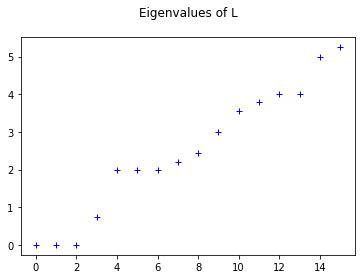

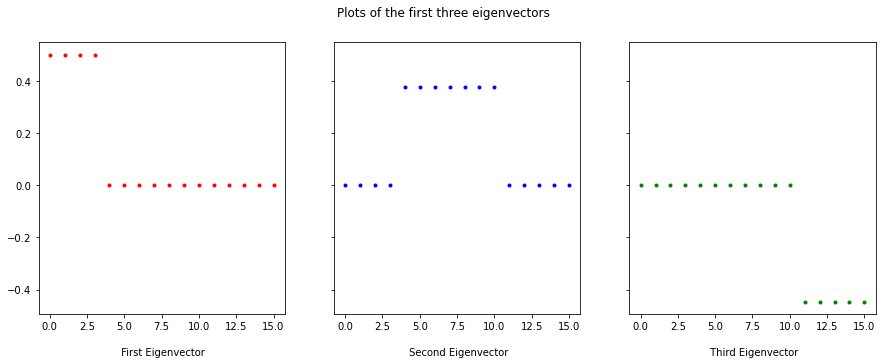

In [7]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
A1 = redA
L = np.diag(A1 @ np.ones((16,)))-A1

l,v = np.linalg.eig(L)
evals = np.sort(l)
indices = np.argsort(l)
print("The eigenvalues of L upon sorting:\n\n",evals)
fig1 = plt.plot(np.sort(l),'+b')
plt.title("Eigenvalues of L\n")
plt.show()


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
axs[0].plot(v[:,indices[0]],'.r')
axs[0].set_xlabel("\n First Eigenvector")
axs[1].plot(v[:,indices[1]],'.b')
axs[1].set_xlabel("\n Second Eigenvector")
axs[2].plot(v[:,indices[2]],'.g')
axs[2].set_xlabel("\n Third Eigenvector")
fig.suptitle('Plots of the first three eigenvectors')

plt.show()

<br>
<img src="https://live.staticflickr.com/65535/53998789925_1bfcd52b2c_b.jpg" width="100%" />
<br>
<div class="alert alert-success">
<strong>Proposition 10.4 (Elden)</strong> Assume that an undirected graph is connected. Then the second smallest eigenvalue $\lambda_2$ of its normalized Laplacian $L_N $is positive.
</div>

#### Some salient points about $L$
>- Spectral Gap: the smallest non-zero eigenvalue of $L$.
>- Algebraic connectivity (or Fiedler value) of the graph: the second smallest eigenvalue  $\lambda_2$ of $L$ (related with the **sparsest cut** of the graph). The corresponding eigenvector is called Fiedler vector.
>- $L$ is a block diagonal matrix if the graph has multiple connected components (upons possible relabeling of vertices).

"The **sparsest cut problem** is to bipartition the vertices so as to minimize the ratio of the number of edges across the cut divided by the number of vertices in the smaller half of the partition. This objective function favors solutions that are both sparse (few edges crossing the cut) and balanced (close to a bisection)."--WikiPedia

**Example**: Pick up the dashed curve (A, B, C) that you think will provide us the sparser cut.
<img src="https://live.staticflickr.com/65535/53997467232_e51caee17a_w.jpg" width=50%>







**Partitioning Problem**: Finding a subgraph $\mathcal{S}$ of a graph $G$, satisfying $m\leq vol(\mathcal{S})\leq vol(\mathcal{S}^c)$, where $m$ is some positive number, such that the edge boundary contains as few edges as possible. Here $vol(\mathcal{S})$ means the sum of the degrees of the vertices in $\mathcal{S}$, and $m$ is some fixed number.

**Conductance**   $\psi(\mathcal{S})$ of a partitioning,

$$
\psi(\mathcal{S}) = \frac{|E(\mathcal{S}, \mathcal{S}^c)|}{\text{min}\{vol(\mathcal{S}),vol(\mathcal{S}^c)\}}
$$

**Examples** Find the conductance of the partitionings by the three cuts given by the dashed lines in the graph above.


**Conductance of a graph**

$$
\psi_G = \text{min}\;{ \psi(\mathcal{S})}
$$
<div class="alert alert-danger">
    The problem of determining the conductance of a graph, for finding an optimal partitioning, has high computational complexity. This is an NP-hard problem.
    </div>

The Cheeger inequalities provides a connection between the Fiedler value and the conductance of a graph. 
<div class="alert alert-success">
<strong>Theorem 10.6 (Cheeger Inequality)</strong> The Fiedler value $\lambda_2$ of a connected graph satisfies 
    $$
    \frac{1}{2}\psi_G^2 < \lambda_2 \leq 2 \psi_G
    $$
</div>

For proof, see the text by Elden and the references therein.

<div class="alert alert-warning">
<strong>Corollary</strong>: The conductance of a connected graph could be small if and only if the Fiedler value $\lambda_2$ is small.
    </div>

#### Eigenvalues of graph Laplacian: An example
---
Check the number of zero eigenvalues and the number of connected components in this graph.

<img src="https://miro.medium.com/max/1400/1*p2vrLlFxdJgGZxCGO5WBmA.gif" width='70%'>

[Image Credit](https://miro.medium.com/max/1400/1*p2vrLlFxdJgGZxCGO5WBmA.gif)

---

### Applications of Spectral Graphs Theory

---
<br>

#### Application: Google Page Ranking (Look at the other notebook on page-ranking.)

Continued on iPad.

Reference 1: Numerical Linear Algebra in Data Mining-[Elden](http://www.cato.tzo.com/brad_bbk/teaching/datamining/research_surveys/elden.pdf), Page 40-46.

Reference 2: Please see [this link](https://rstudio-pubs-static.s3.amazonaws.com/239261_8a607707294341c4b7e26acf728c28bd.html) on power iteration and page-rank.

---

**Power-iteration** [WikiPedia](https://en.wikipedia.org/wiki/Power_iteration)

An iterative algorithm to find the dominant eigenvalue and associated eigenvector of certain matrices.

Start with a random initialization $v_0$ repeat until convergence

$$\large
v_{k+1} = \frac{Av_k}{\|Av_k\|} ;\qquad \lambda_{k} = \frac{v_{k+1}Av_{k}}{v_{k+1}v_{k}}
$$

Necessary and sufficient condition for convergence
>1. The dominant eigenvalue must  be larger than every other eigenvalue in magnitude. rate of convergence is proportional to $|\lambda_2/\lambda_1|$
>2. The initialization $v_0$ must have a nonzero component along the eigenvector associated with the dominant eigenvalue.

In [64]:
import numpy as np
def power_method(A, max_iter):
    v_old = np.random.rand(A.shape[1]) # Why should you choose randomly
    #csrA = csr_matrix(A)
    for k in range(max_iter):
        v_new = A.dot(v_old)

        # Need to normalize
        v_new = v_new / np.linalg.norm(v_new)
        # Test for convergence
        v_old = v_new
        
    evalue = np.dot(v_new,A.dot(v_new))/np.linalg.norm(v_new)
    return v_new, evalue

In [65]:
power_method(np.array([[0.6, 0.2], [0.2, 0.7]]), 100)

(array([0.61541221, 0.78820544]), 0.856155281280883)

### QR Algorithm for Eigenvalues and eigenvectors
---
>- Step 1: Intialize: $A_0 = A$
>- Step 2: Repeat until convergence k=0:MaxIterations
    >>-  Find QR decomposition of $A_k = Q_k R_k$
    >>-  $A_{k+1} = R_k Q_k$ $\quad \left(= Q_k^{-1} Q_k R_k Q_k = Q_k^{-1} A_k Q_k = Q_k^{\mathsf{T}} A_k Q_k, \right)$

Under certain conditions the above converges to the **Schur Form** of $A = UTU^T$, where $T$ is upper triangular, containing all the eigenvalues on the diagonal element.

Improvement: Hessenberg Form, Shifted implicit forms.

**ChatGPT**: Provide a list of applications of spectral graph theory in data science

Spectral graph theory, which studies properties of a graph in relation to the eigenvalues and eigenvectors of matrices associated with the graph (such as the adjacency matrix or the Laplacian matrix), has numerous applications in data science. Here are some key applications:

**Clustering and Community Detection**:

Spectral clustering is a popular method for grouping similar data points. It uses the eigenvectors of the graph Laplacian to identify clusters in the data.
Community detection in social networks often leverages spectral properties to identify tightly-knit groups within larger networks.

**Dimensionality Reduction**:

Techniques like Laplacian Eigenmaps and Locally Linear Embedding (LLE) use spectral methods to reduce the dimensionality of data while preserving the intrinsic geometry.

**Graph Embedding**:

Embedding nodes of a graph into a low-dimensional space using spectral methods helps in tasks like visualization, link prediction, and node classification.

**Recommendation Systems**:

Spectral methods can enhance collaborative filtering approaches by representing user-item interactions as graphs and analyzing the spectral properties to predict user preferences.

**Graph Partitioning**:

Spectral bisection and other spectral partitioning techniques are used to divide a graph into parts with minimal edge cuts, useful in load balancing, parallel computing, and network design.

**Image Segmentation**:

In computer vision, spectral clustering is applied to segment images into regions with similar properties by treating the image as a graph of pixels.
Signal Processing on Graphs:

Graph signal processing extends classical signal processing techniques to signals defined on graphs, leveraging spectral graph theory for filtering, sampling, and transforming graph signals.

**Natural Language Processing**:

Spectral methods are used in tasks like word embedding, semantic analysis, and document clustering by representing text data as graphs and analyzing their spectral properties.

**Anomaly Detection**:

Spectral techniques help detect anomalies in network traffic, financial transactions, and other datasets by identifying deviations from the normal spectral patterns.

**Machine Learning**:

Spectral methods are used in semi-supervised learning to incorporate the structure of unlabeled data, enhancing the performance of classifiers by leveraging the graph Laplacian.

**Network Analysis**:

Understanding the robustness, connectivity, and other structural properties of networks through spectral measures like the spectral gap, eigenvalue distribution, and centrality measures.

**Quantum Computing**:

Spectral graph theory aids in the design and analysis of quantum algorithms, particularly in solving problems like the graph isomorphism problem and quantum walks.


These applications illustrate the versatility of spectral graph theory in addressing complex problems in data science by leveraging the deep connections between graph structures and their spectral properties.

In [27]:
## PLEASE DISREGARD THE FOLLOWING

%%html
<style>
.eqnbox{
    margin:auto;width:500px;padding:20px;
    border: 3px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
.eqnbox2{
    margin:auto;width:500px;padding:20px;
    border: 1px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
.eqnbox3{
    margin:auto;width:700px;padding:20px;background-color:#c6d6b4;
    border: 1px solid green; border-radius:15px;margin-top:20px;margin-bottom:20px;
}
</style>

In [16]:
# Example of page rank 4x4 matrix
A = np.array([[0,1/3, 1/3, 1/3],[0, 0, 1/2, 1/2],[1,0,0,0],[1/2,0,1/2,0]],dtype=float).T
print("Link Matrix:\n",A)

eVec,_ = power_method(A,100)
print(eVec)
print("Pages ranked in the increasing order of importance:", np.argsort(eVec)+1)


Link Matrix:
 [[0.         0.         1.         0.5       ]
 [0.33333333 0.         0.         0.        ]
 [0.33333333 0.5        0.         0.5       ]
 [0.33333333 0.5        0.         0.        ]]
[0.72101012 0.24033671 0.54075759 0.36050506]
Pages ranked in the increasing order of importance: [2 4 3 1]


In [20]:
rows = np.zeros((3,60),dtype='int') 
print rows 
for k in range(60):
    rows[:,k] = np.array([[k,k,k]])
    
row_index = rows.T.flatten()
print(row_index)
val = np.ones_like(row_index)
col_index = 

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[ 0  0  0  1  1  1  2  2  2  3  3  3  4  4  4  5  5  5  6  6  6  7  7  7  8
  8  8  9  9  9 10 10 10 11 11 11 12 12 12 13 13 13 14 14 14 15 15 15 16 16
 16 17 17 17 18 18 18 19 19 19 20 20 20 21 21 21 22 22 22 23 23 23 24 24 24
 25 25 25 26 26 26 27 27 27 28 28 28 29 29 29 30 30 30 31 31 31 32 32 32 33
 33 33 34 34 34 35 35 35 36 36 36 37 37 37 38 38 38 39 39 39 40 40 40 41 41
 41 42 42 42 43 43 43 44 44 44 45 45 45 46 46 46 47 47 47 48 48 48 49 49 49
 50 50 50 51 51 51 52 52 52 53 53 53 54 54 54 55 55 55 56 56 56 57 57 57 58
 58 58 59 59 59]


In [5]:
!jt -t grade3

In [3]:
import numpy as np
H = np.array([[1,0,0,0],[0,2/3,-2/3,1/3],[0,-2/3,-1/3,2/3],[0,1/3,2/3,2/3]],dtype='float')

In [4]:
print(H)

[[ 1.          0.          0.          0.        ]
 [ 0.          0.66666667 -0.66666667  0.33333333]
 [ 0.         -0.66666667 -0.33333333  0.66666667]
 [ 0.          0.33333333  0.66666667  0.66666667]]


In [5]:
A = np.array([[3,4,3,2],[2,1,2,5],[-2,-1,3,2],[1,4,2,5]],dtype='float')

In [6]:
print (H@A)

[[ 3.          4.          3.          2.        ]
 [ 3.          2.66666667  0.          3.66666667]
 [ 0.          2.33333333 -1.         -0.66666667]
 [ 0.          2.33333333  4.          6.33333333]]


In [2]:
!jt -l

Available Themes: 
   chesterish
   grade3
   gruvboxd
   gruvboxl
   monokai
   oceans16
   onedork
   solarizedd
   solarizedl


In [7]:
list1 = [1,2,3]

In [8]:
print(list1*3)
#or use repeat.

[1, 2, 3, 1, 2, 3, 1, 2, 3]


In [4]:
C = np.array([[-1, 0, 1, 1, 0, 0],
              [0, 1, -1, 0, 0, 1],
              [1, -1, 0, 0, 1, 0],
              [0, 0, 0, -1, -1, -1]])

In [5]:
print(C@C.T)

[[ 3 -1 -1 -1]
 [-1  3 -1 -1]
 [-1 -1  3 -1]
 [-1 -1 -1  3]]
